# Data Analysis

Referências: 
- [Exploratory Data Analysis for Natural Language Processing: A Complete Guide to Python Tools](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)
- [Word Cloud showing several ' amongst words and not sure why](https://stackoverflow.com/questions/67148707/word-cloud-showing-several-amongst-words-and-not-sure-why)
- [Sentiment Analysis of App Reviews: A Comparison of BERT, spaCy, TextBlob, and NLTK](https://francisgichere.medium.com/sentiment-analysis-of-app-reviews-a-comparison-of-bert-spacy-textblob-and-nltk-9016054d54dc)
- [Sentiment Classification using SpaCy](https://www.kaggle.com/code/krutarthhd/sentiment-classification-using-spacy)
- [Building a Sentiment Analysis Model Using spaCy: A Practical Guide](https://mysteryweevil.medium.com/building-a-sentiment-analysis-model-using-spacy-a-practical-guide-261d881e5dcb)
- [spacytextblob](https://spacy.io/universe/project/spacy-textblob)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
import pandas as pd
import pprint
import seaborn as sns
import spacy

from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
from wordcloud import WordCloud

In [41]:
# ! python -m spacy download pt_core_news_md

In [3]:
reviews_df = pd.read_csv("../data_preparation/glassdoor_reviews.csv")

In [4]:
reviews_df.head()

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",15 de dez. de 2023,5.0,1
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,15 de dez. de 2023,5.0,0
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,11 de mar. de 2023,4.0,1
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,11 de mar. de 2023,4.0,0
4,60212043,Tecnomapas,Funcionário confidencial,"Ex-funcionário(a), menos de um ano",Única vantagem era o trabalho ser home office,24 de fev. de 2022,1.0,1


## Analyzing text statistics

### Word Frequency

In [5]:
reviews_df["review_text_length"] = reviews_df["review_text"].str.len()

In [6]:
reviews_df.head()

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,review_text_length
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",15 de dez. de 2023,5.0,1,60
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,15 de dez. de 2023,5.0,0,30
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,11 de mar. de 2023,4.0,1,46
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,11 de mar. de 2023,4.0,0,45
4,60212043,Tecnomapas,Funcionário confidencial,"Ex-funcionário(a), menos de um ano",Única vantagem era o trabalho ser home office,24 de fev. de 2022,1.0,1,45


In [7]:
def plot_reviews_text_length_histogram(reviews_df):
    bins = 40

    axes = sns.histplot(data=reviews_df, x="review_text_length", bins=bins)

    plt.xlabel("Review Text Length")
    plt.ylabel("Frequency")
    plt.title("Histogram of Review Text")
    plt.show()

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


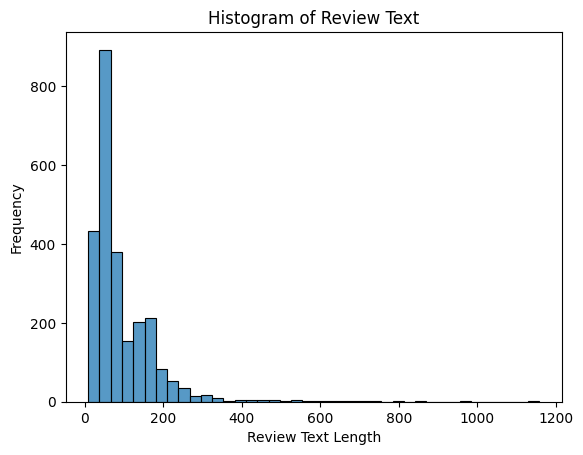

In [8]:
plot_reviews_text_length_histogram(reviews_df)

O Histograma mostra que a maior parte dos reviews tem cerca de 200 caracteres.

In [9]:
reviews_df[reviews_df["review_text"].str.len() > 1000]

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,review_text_length
1313,32305292,Cigam Software Corporativo,Desenvolvedor De Software,"Ex-funcionário(a), mais de 3 anos",Diversos motivos me fazem criticar a CIGAM Pro...,10 de mar. de 2020,1.0,0,1157


In [10]:
longest_text = reviews_df[reviews_df["review_text"].str.len() > 1000]["review_text"].iloc[0]

In [11]:
len(longest_text)

1157

In [12]:
pprint.pprint(longest_text)

('Diversos motivos me fazem criticar a CIGAM Prodaly, mas acredito que os '
 'maiores são: pressão gigantesca da gerência (trabalhar madrugadas, finais de '
 'semana, etc); gerência não ouve os seus funcionários - sempre toma decisões '
 'por conta própria e que quase sempre se mostraram ruins ou erradas; '
 'linguagem de programação extremamente de nicho (linguagem magic), ou seja, '
 'se quiser seguir carreira nessa linguagem vai se aposentar na Prodaly, e se '
 'não bastasse ser de nicho, é uma linguagem defasada que pouco vai te ajudar '
 'no mercado de trabalho fora dali; gerência faz diversas reuniões apenas para '
 'esculachar os funcionários e dizer como eles são incompetentes; salários '
 'abaixo ou na média do mercado (só vai subir se você decidir que a empresa '
 'vale mais que sua vida e puxar o saco da gerência, pois é esse tipo de '
 'pessoa que eles querem contratar); Não pode utilizar fone de ouvido para '
 'programar; intervalo restritos há 10min, como se fosse uma esp

### Reviews' word number

In [13]:
def plot_reviews_word_number_histogram(review_text_series):
    word_counts = review_text_series.str.split().map(lambda x: len(x))
    sns.histplot(word_counts, bins=30, kde=False)

    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.title("Histogram of Word Counts")
    plt.show()

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


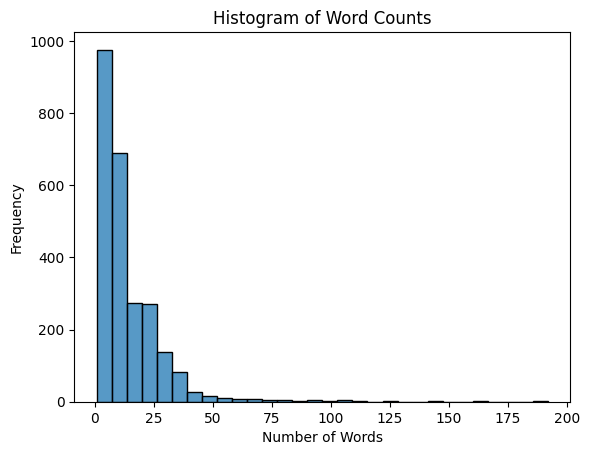

In [14]:
plot_reviews_word_number_histogram(reviews_df["review_text"])

O gráfico mostra que a maior parte dos reviews tem até 50 palavras

In [15]:
len(longest_text.split())

192

### Reviews' word average

In [16]:
def plot_reviews_word_average_histogram(review_text_series):
    word_average = (
        review_text_series.str.split()
        .apply(lambda x: [len(i) for i in x])
        .map(lambda x: np.mean(x))
    )

    sns.histplot(word_average, bins=80, kde=False)

    plt.xlabel("Average Word Length")
    plt.ylabel("Frequency")
    plt.title("Histogram of Average Word Length")
    plt.show()

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


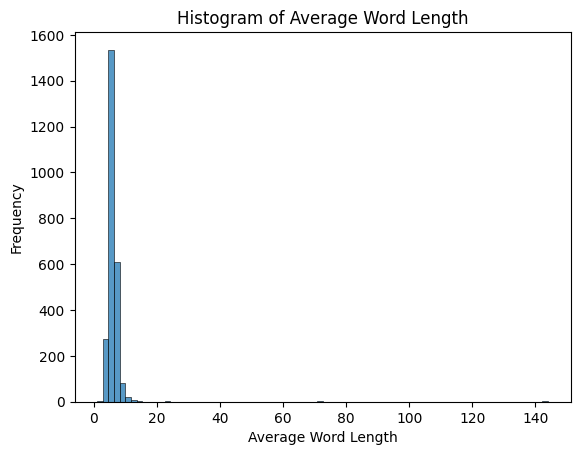

In [17]:
plot_reviews_word_average_histogram(reviews_df["review_text"])

O gráfico mostra que a maioria dos reviews tem média de 15 palavras.

### Most Frequently Stop Words

In [18]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_stopwords_portuguese = nltk.corpus.stopwords.words("portuguese")

In [20]:
corpus = []
review_text = reviews_df["review_text"].str.split().values.tolist()
corpus = [word for i in review_text for word in i]

In [21]:
dic = defaultdict(int)
for word in corpus:
    if word.lower() in stop_stopwords_portuguese:
        dic[word] += 1

In [22]:
top_stopwords = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
top_stopwords_df = pd.DataFrame(top_stopwords, columns=["word", "frequency"])

In [23]:
top_stopwords_df.head()

,word,frequency
0,de,2136
1,e,1298
2,a,718
3,para,637
4,que,594


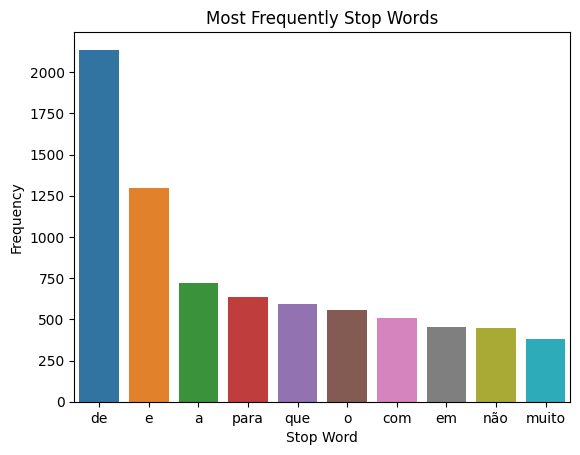

In [24]:
sns.barplot(data=top_stopwords_df, x="word", y="frequency")

plt.xlabel("Stop Word")
plt.ylabel("Frequency")
plt.title("Most Frequently Stop Words")
plt.show()

### Most Frequently Non Stop Words

In [25]:
counter = Counter(corpus)
most = counter.most_common()

top_non_stopwords = {}
for word, count in most[:40]:
    word_lower = word.lower()
    if word_lower not in stop_stopwords_portuguese:
        if word_lower not in top_non_stopwords:
            top_non_stopwords[word_lower] = count
        else:
            top_non_stopwords[word_lower] += count

top_non_stopwords = list(top_non_stopwords.items())

In [26]:
top_non_stopwords_df = pd.DataFrame(top_non_stopwords, columns=["word", "frequency"])

In [27]:
top_non_stopwords_df.head()

,word,frequency
0,empresa,697
1,trabalho,219
2,ambiente,201
3,plano,187
4,crescimento,150


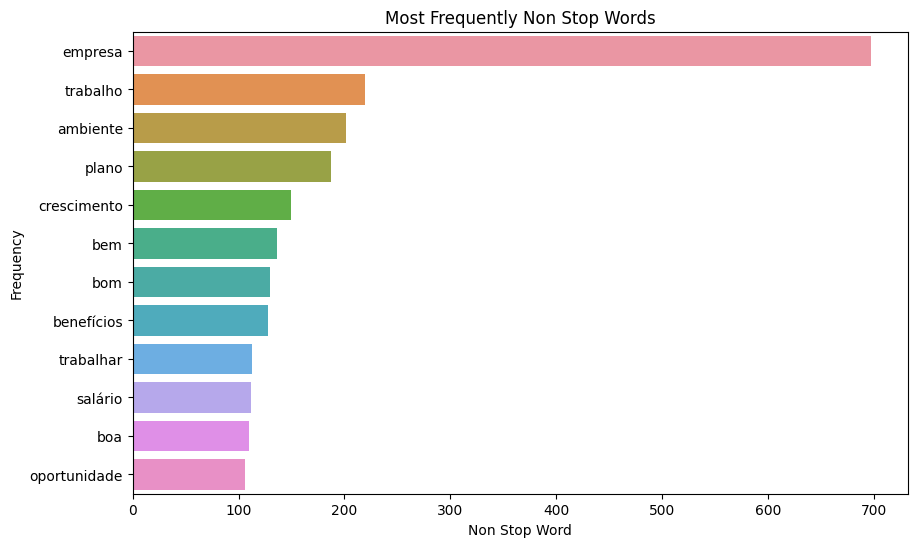

In [28]:
ax = plt.subplots(1, figsize=(10, 6))

ax = sns.barplot(data=top_non_stopwords_df, x="frequency", y="word")

plt.xlabel("Non Stop Word")
plt.ylabel("Frequency")
plt.title("Most Frequently Non Stop Words")
plt.show()

### N-Grams

In [29]:
def plot_top_ngrams_barchart(review_text, n_grams=2, top=10):
    vec = CountVectorizer(ngram_range=(n_grams, n_grams)).fit(review_text)
    bag_of_words = vec.transform(review_text)
    sum_words = bag_of_words.sum(axis=0)
   
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    top_n_grams = words_freq[:top]
    x, y = map(list, zip(*top_n_grams))

    sns.barplot(x=y, y=x)

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


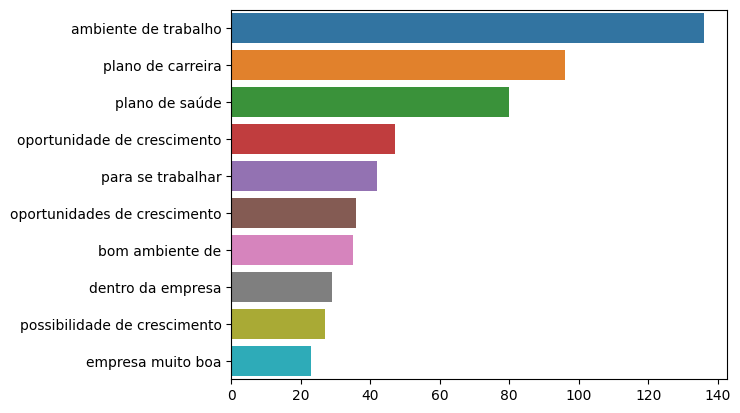

In [30]:
plot_top_ngrams_barchart(reviews_df["review_text"], n_grams=3, top=10)

### Wordcloud

In [31]:
corpus[:5]

['Companheirismo', 'entre', 'os', 'colegas,', 'oportunidade']

In [32]:
len(corpus)

37164

In [33]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
non_stopwords_corpus = []
for word in corpus:
    word_lower = word.lower()
    if word_lower not in stop_stopwords_portuguese and word_lower not in punctuation:
        non_stopwords_corpus.append(word_lower)

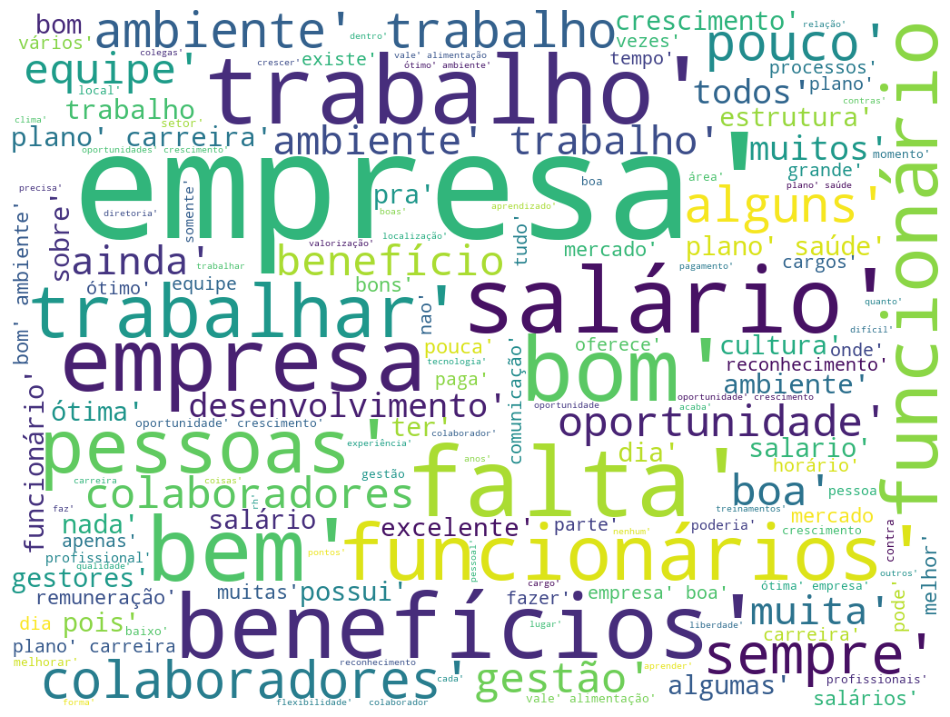

In [35]:
wordcloud = WordCloud(
    background_color="white", random_state=103, max_words=150, width=1024, height=768
)

fig = plt.figure(1, figsize=(12, 12))
plt.axis("off")

plt.imshow(wordcloud.generate(str(non_stopwords_corpus)))

plt.show()

### Named Entity Recognition

```text
PERSON:      People, including fictional.
NORP:        Nationalities or religious or political groups.
FAC:         Buildings, airports, highways, bridges, etc.
ORG:         Companies, agencies, institutions, etc.
GPE:         Countries, cities, states.
LOC:         Non-GPE locations, mountain ranges, bodies of water.
PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
EVENT:       Named hurricanes, battles, wars, sports events, etc.
WORK_OF_ART: Titles of books, songs, etc.
LAW:         Named documents made into laws.
LANGUAGE:    Any named language.
DATE:        Absolute or relative dates or periods.
TIME:        Times smaller than a day.
PERCENT:     Percentage, including ”%“.
MONEY:       Monetary values, including unit.
QUANTITY:    Measurements, as of weight or distance.
ORDINAL:     “first”, “second”, etc.
CARDINAL:    Numerals that do not fall under another type.
```

In [36]:
nlp = spacy.load("pt_core_news_md")

In [37]:
reviews_df.shape

(2532, 9)

In [38]:
# reviews_df_sample = reviews_df.sample(frac=0.0039)
reviews_df_sample = reviews_df.iloc[160:170]

In [39]:
reviews_df_sample.head()

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,review_text_length
160,42342325,Abaco Tecnologia de Informação Ltda,Desenvolvedor Júnior,Funcionário(a) atual,"Pagam sempre em dia, bastante amigaveis",11 de fev. de 2021,4.0,1,39
161,42342325,Abaco Tecnologia de Informação Ltda,Desenvolvedor Júnior,Funcionário(a) atual,Bater ponto e banco de horas,11 de fev. de 2021,4.0,0,28
162,48308283,Abaco Tecnologia de Informação Ltda,Programador Júnior,"Funcionário(a) atual, mais de um ano",ótima empresa para se trabalhar,14 de jun. de 2021,5.0,1,31
163,48308283,Abaco Tecnologia de Informação Ltda,Programador Júnior,"Funcionário(a) atual, mais de um ano",Não possui projetos de incentivo a educação,14 de jun. de 2021,5.0,0,43
164,81269919,Agenda Assessoria,Analista De Sistemas Sênior,"Funcionário(a) atual, mais de 8 anos",Limpeza Bons Equipamentos Almoço excelente,25 de out. de 2023,5.0,1,42


In [40]:
for i in range(reviews_df_sample.shape[0]):
    doc = nlp(reviews_df_sample.iloc[i]["review_text"])

    if doc.ents:
        spacy.displacy.render(doc, style="ent")
        print('*'*100)

****************************************************************************************************


****************************************************************************************************


****************************************************************************************************
